In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

In [2]:
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

### font configuration

In [3]:
# from matplotlib import rcParams

# title_font = {'fontname':'Arial', 'size':'23', 'color':'black', 'weight':'normal',
#               'verticalalignment':'bottom'}

# axis_font = {'fontname':'Arial', 'size':'23', 'color':'black'}

# font = {'family': 'arial',
#         'color':  'black',
#         'weight': 'bold',
#         'size': 16,
#         }

font_16 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 16,
        }

font_12 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 12,
        }

font_24 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 24,
        }

font_32 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 32,
        }


# Color

In [2]:
# digonto vai nature paper
colors = ['black', 'magenta', 'green', 'deepskyblue', 'orange']

# ok 1
colors = ['black', 'purple', 'magenta', 'green', 'dodgerblue', 'orange', 'gold']

spikes = np.linspace(0, 1, 2000)
size=spikes.shape[0]//len(colors)

for a in range(len(colors)):
    plt.eventplot(spikes[a*size:(a+1)*size], orientation='horizontal', linelengths=0.9, color = colors[a], label=colors[a])
    pass
# plt.show()
plt.legend()
plt.ylim([0.5,2])

NameError: name 'np' is not defined

### directories

In [28]:
out_img_dir = "../figures/"
# out_data_dir = "./calculated_data/"
in_data_dir = "../data/site-percolation/critical/"
# in_data_dir = "../data/bond-percolation/critical/"

#### signatures


In [29]:
signature = "sq_lattice_bond_percolation__periodic"
signature = "sq_lattice_site_percolation_periodic_"

print(in_data_dir)
file_signature = in_data_dir + signature + '*_critical_' + '*'
# file_signature = out_data_dir + signature + convolved_signature

files = glob.glob(file_signature)
# print('selected signature')
print(signature)
print(file_signature)

../data/site-percolation/critical/
sq_lattice_site_percolation_periodic_
../data/site-percolation/critical/sq_lattice_site_percolation_periodic_*_critical_*


In [31]:
files

['../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_300_2018.7.11_12.46.45.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_300_2018.7.11_6.15.35.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_400_2018.7.12_15.20.47.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_350_2018.7.11_13.46.40.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_100_2018.7.10_23.8.20.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_300_2018.7.11_6.15.34.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_250_2018.7.11_3.13.0.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_400_2018.7.12_2.52.13.txt',
 '../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_300_2018.7.11_15.43.9.txt',

In [32]:
length_to_consider = range(100, 450, 50)
list(length_to_consider)


[100, 150, 200, 250, 300, 350, 400]

In [33]:

for file in files:
    print(file)
    f = open(file)
    l = f.readline()  
    i = 0
    while l:
        print(l)
        l = f.readline()
        i += 1
        if i > 10:
            break
            pass
        pass
    break

../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_300_2018.7.11_12.46.45.txt
{"length":300, "ensemble_size":5000, "signature":"sq_lattice_site_percolation_periodic_"}

#critical occupation probability or pc

#Spanning Cluster Size or S

#S1 is measured by bond

#S2 is measured by site

#<pc>	<S1>	<S2>

0.587111	38942	14217	

0.5941	106481	38835	

0.590767	68365	24953	

0.599233	117000	42807	

0.589878	92570	33757	



### Check ensemble sizes

critical occupation probability or pc

Spanning Cluster Size or S

S1 is measured by bond = column 1

S2 is measured by site = column 2

In [41]:
data = dict()
ensembles = dict()
for L in length_to_consider:
    ensembles[L] = 0
    pass

for file in files:
    print(file)
    f = open(file)
    l = f.readline()     
    print(l)
#     print(l[1:-18]+"}")
#     l = l[1:-18]+"}"
    if l[0] == '#':
        header = json.loads(l[1:])
    else:
#         print(l)
#         l = l.strip()
#         print(l)
        header = json.loads(l)
        pass
    L = int(header['length'])
    ensmbl = int(header['ensemble_size'])
    ensembles[L] += ensmbl
    print(header)

    
    cs = np.loadtxt(file, usecols=(1,), skiprows=1, delimiter='\t') ## cluster size = cs

    if L in data:
        tmp = data[L]
        data[L] = np.append(tmp, cs, axis=0)
        pass
    else:
        data[L] = cs
        pass
    pass



../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_300_2018.7.11_12.46.45.txt
{"length":300, "ensemble_size":5000, "signature":"sq_lattice_site_percolation_periodic_"}

{'length': 300, 'ensemble_size': 5000, 'signature': 'sq_lattice_site_percolation_periodic_'}
../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_300_2018.7.11_6.15.35.txt
{"length":300, "ensemble_size":5000, "signature":"sq_lattice_site_percolation_periodic_"}

{'length': 300, 'ensemble_size': 5000, 'signature': 'sq_lattice_site_percolation_periodic_'}
../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_400_2018.7.12_15.20.47.txt
{"length":400, "ensemble_size":5000, "signature":"sq_lattice_site_percolation_periodic_"}

{'length': 400, 'ensemble_size': 5000, 'signature': 'sq_lattice_site_percolation_periodic_'}
../data/site-percolation/critical/sq_lattice_site_percolation_periodic__critical_350_2018.7.11_13.46.40.txt
{"length":350, "e

In [42]:
data[300]

array([ 38942., 106481.,  68365., ...,  61844.,  46898.,  79777.])

In [43]:
ensembles

{100: 20000,
 150: 20000,
 200: 20000,
 250: 20000,
 300: 25000,
 350: 20000,
 400: 20000}

### calculating once

In [44]:
list_of_data = []
for L in data.keys():
    x1 = data[L].T
    list_of_data.append([L, np.mean(x1)])
    pass
list_of_data = np.array(list_of_data).T

In [45]:
list_of_data


array([[3.00000000e+02, 4.00000000e+02, 3.50000000e+02, 1.00000000e+02,
        2.50000000e+02, 1.50000000e+02, 2.00000000e+02],
       [8.32192097e+04, 1.43233484e+05, 1.11273483e+05, 1.03762402e+04,
        5.88983652e+04, 2.23739679e+04, 3.85236065e+04]])

In [46]:
log_of_data = np.log(list_of_data)
x = log_of_data[0]
y = log_of_data[1]

LinregressResult(slope=1.893909768018131, intercept=0.5256346245155932, rvalue=0.9999996228124839, pvalue=1.6782127958410154e-16, stderr=0.0007356446106495813)


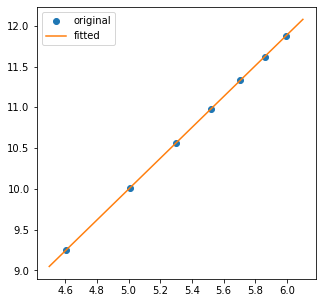

In [47]:
fig = plt.figure(figsize=(5, 5))


plt.plot(x, y, 'o', label='original')
regress = stats.linregress(x, y)
print(regress)
m, c = regress[0], regress[1]

n = np.linspace(4.5, 6.1, 10)
plt.plot(n, n*m + c, label='fitted')
plt.legend()

In [18]:
m, c = regress[0], regress[1]

In [19]:
m

1.8960037252908304

### output graphs

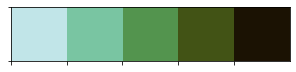

In [19]:
# n = 5
# palette = sns.cubehelix_palette(n_colors=n,start=1.2, light=0.85, dark=0.07, hue=1, gamma=0.95, rot=0.5)
# sns.palplot(palette)

In [20]:
# my_cmap = ListedColormap(sns.color_palette("cubehelix", 8).as_hex())
# sns.set()
# sns.set_palette(palette)

# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
# sns.set_style(styles[4])

#### occupation probability

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


../figures/sq_lattice_site_percolation_periodic_-fractal_dimension_1.8939-with.eps


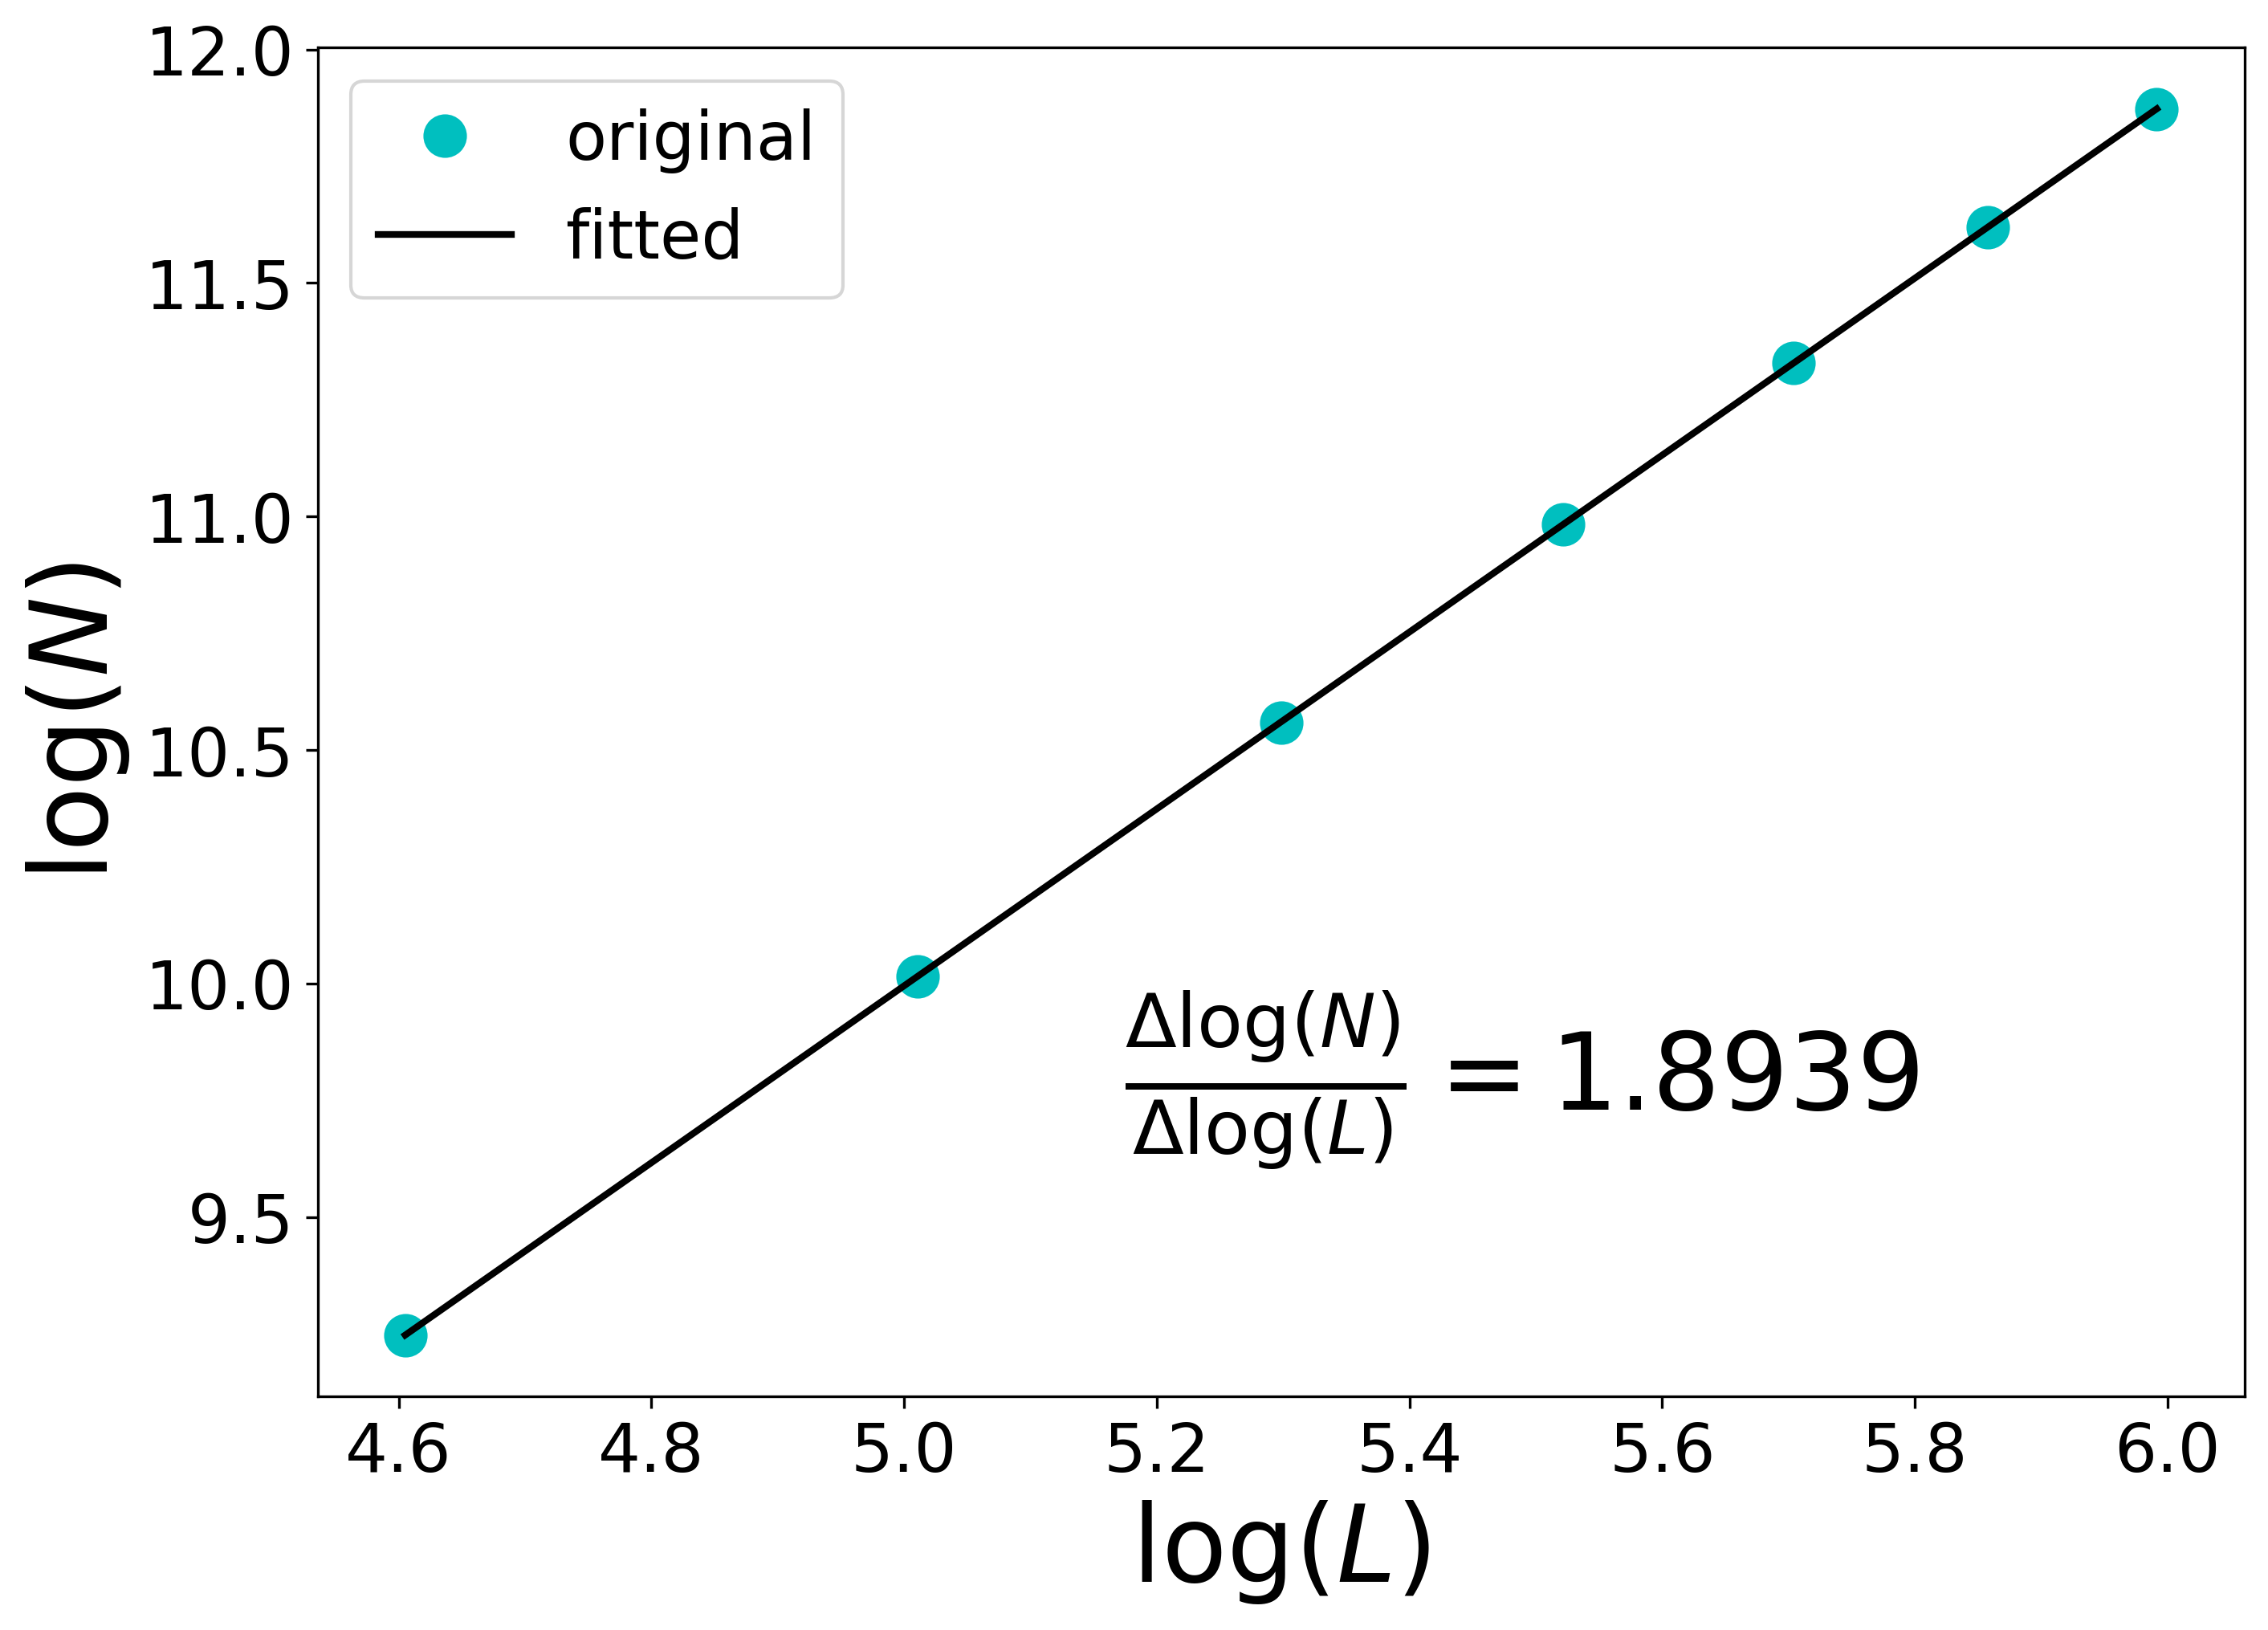

In [50]:

fig, ax = plt.subplots(figsize=(10,7),  dpi=300, constrained_layout=False)

ax.plot(x, y, 'oc', label='original', markersize=12)
n = np.linspace(np.min(x), np.max(x), 10)
ax.plot(n, n*m + c, 'k', label='fitted', linewidth=2)


ax.set_position([0.165, 0.13, 0.8, 0.8])
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel(r'$\log(L)$', font_32)
plt.ylabel(r'$\log(N)$', font_32)

# fig.text(0.6, 0.5, "slope={:0.5f}".format(m))
# ax.text(0.6, 0.5, r"$\frac{\delta \log(M)}{\delta \log(L)}={:0.5f}$".format(m)) # symbolic
text_to_display = r"$\frac{\Delta\log(N)}{\Delta\log(L)}=$"
text_to_display += "${:0.4f}$".format(m)
fig.text(0.5, 0.3, text_to_display, font_32) # symbolic

out_file_name = out_img_dir + signature + '-fractal_dimension_{:.4f}-with.eps'.format(m)
plt.savefig(out_file_name)
print(out_file_name)

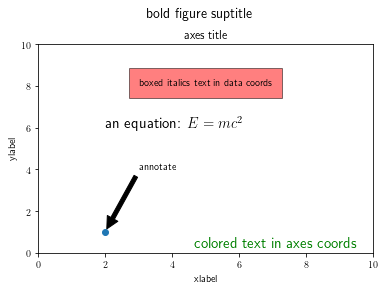

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

# ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()